In [1]:
from numpy import arange
from matplotlib import pyplot
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

The file shows three different objective functions to illustrate the strengths and weaknesses of three different variants of the Gradient Descent algorithm. The first version is vanilla, the second one utilizes Gradient Descent with Momentum, and finally, Gradient Descent with Inverse Time Decay, which involves reducing the learning rate (in our case 'step size') as the number of iterations increases. The idea behind this addition is to mitigate issues caused by noise in some stochastic processes. However, the problem of correct algorithm initialization remains, which is heavily dependent on the starting point. In fact, as the number of iterations increases, the learning rate becomes less and less significant.

#Different Gradient Descent Functions Definitions

Vanilla Gradient Descent

In [2]:
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size*gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)

  # print the last value
	print('>%d f(%s) = %.5f' % (i, solution[0], solution_eval[0]))

	return [solutions, scores]

Gradient Descent With Momentum

In [3]:
def gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = momentum*change-step_size*gradient
		# take a step
		solution = solution+new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)

  # print the last value
	print('>%d f(%s) = %.5f' % (i, solution[0], solution_eval[0]))

	return [solutions, scores]

Gradient Descent With Inverse Time Decay

In [4]:
def gradient_descent_ITD(objective, derivative, bounds, n_iter, step_size, decay_rate):
    # save the first step_size
    initial_step_size = step_size
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution-step_size*gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)

        # calculate new step_size
        step_size = initial_step_size/(1+decay_rate*i)

    # print the last value
    print('>%d f(%s) = %.5f' % (i, solution[0], solution_eval[0]))

    return [solutions, scores]

#Objective function f(x)=x^3+6x^2-3x-5

The following function has a local minimum at the coordinate X=-2+√5≈0.236067 and was chosen simply to vary the previous polynomial function with a slightly more complex one. Observing the function, we can infer that using the Gradient Descent variant with Momentum in this case will not provide any particular advantage. However, in the next function, a case will be shown where Momentum plays a crucial role.

In [5]:
def objective(x):
    return x**3+6*x**2-3*x-5

In [6]:
# derivative of objective function
def derivative(x):
    return 2*x**2+12*x-3

In [7]:
# define range for input
r_min, r_max = -7.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)

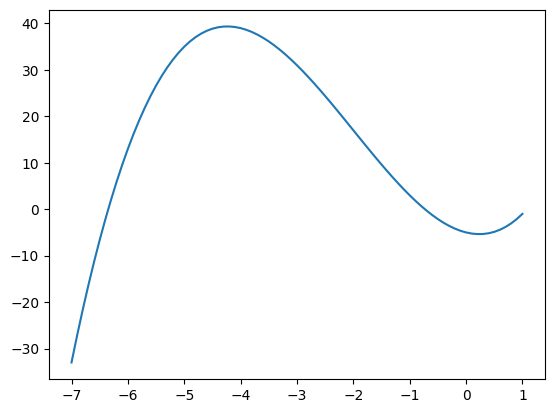

In [8]:
# create a line plot of input vs result
pyplot.plot(inputs, results)
# show the plot
pyplot.show()

##Vanilla Gradient Descent

>58 f(0.23639523645401486) = -5.36068


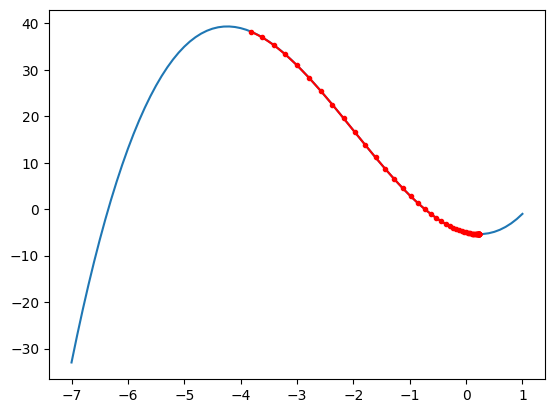

In [51]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-7.0, 1.0]])
# define the total iterations
n_iter = 59
# define the step size
step_size = 0.01
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

>609 f(0.2360116543649273) = -5.36068


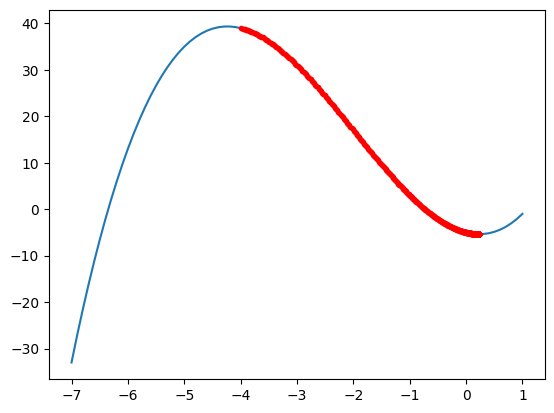

In [44]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-7.0, 1.0]])
# define the total iterations
n_iter = 610
# define the step size
step_size = 0.001
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In these two cases, we can observe how the same algorithm, using two different levels of precision and different numbers of iterations, achieves two different results only in the fourth decimal place.

##Gradient Descent with Momentum

>58 f(0.24037087340690724) = -5.36056


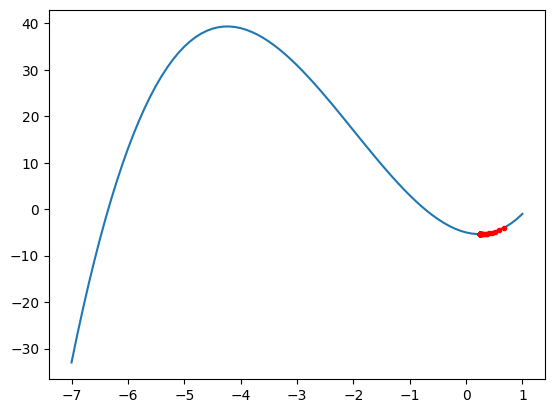

In [58]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-7.0, 1.0]])
# define the total iterations
n_iter = 59
# define the step size
step_size = 0.01
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

>37 f(0.23681888358545894) = -5.36068


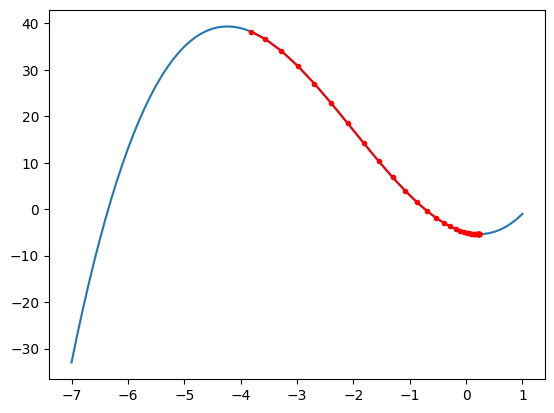

In [66]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-7.0, 1.0]])
# define the total iterations
n_iter = 38
# define the step size
step_size = 0.01
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

There are no particular observations to be made regarding this variant, as, as I mentioned before, given the structure of the function, the application of momentum neither helps nor hinders. However, I changed the seed to observe the gradient descent from the other side of the function.

##Gradient Descent with Inverse Time Decay


>58 f(0.23629725848645622) = -5.36068


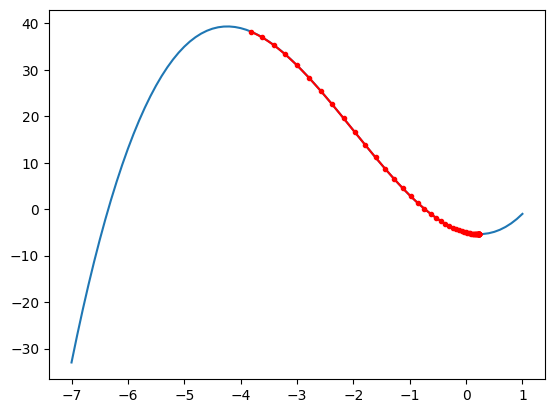

In [85]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-7.0, 1.0]])
# define the total iterations
n_iter = 59
# define the step size
step_size = 0.01
# define decay rate
decay_rate = 0.0001
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_ITD(objective, derivative, bounds, n_iter, step_size, decay_rate)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In the case of Inverse Time Decay, we can observe an improvement compared to the first vanilla version of the algorithm, having kept the step precision and the number of iterations constant. This is because, as the iterations increase, the step precision improves thanks to the addition of Inverse Time Decay.

#Objective Function f(x)=x^4+x^3-x^2

This function has two minima: a local minimum f(localMin)=((√41)/8)-(3/8)≈0.425390 and a global minimum f(globalMin)=(-3/8)-(√41)/8≈-1.175390 . This function was chosen because, despite non-optimal initialization, the momentum technique can help converge to the global optimum. Other possible examples of such functions could be trigonometric functions with sine and cosine, like f(x)=(1/√|x|)*sin(|x|), which exhibit oscillating behavior and have infinite local minima but only two global minima.

In [103]:
def objective(x):
    return x**4+x**3-x**2

In [104]:
# derivative of objective function
def derivative(x):
    return 4*x**3+3*x**2-2*x

In [105]:
# define range for input
r_min, r_max = -2.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)

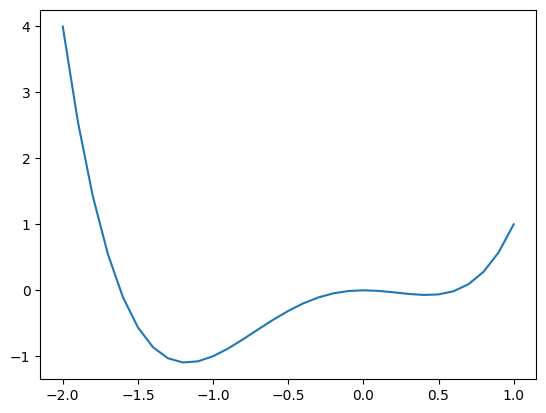

In [106]:
# create a line plot of input vs result
pyplot.plot(inputs, results)
# show the plot
pyplot.show()

##Vanilla Gradient Descent

>99 f(0.4370646295662958) = -0.07104


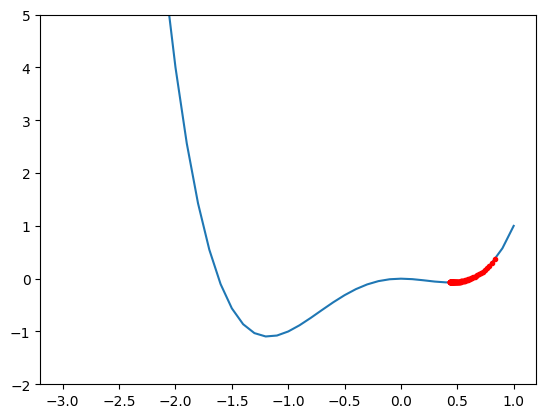

In [116]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-3.0, 1.0]])
# define the total iterations
n_iter = 100
# define the step size
step_size = 0.01
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-2.0, 5.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

>99 f(-1.1754742601019037) = -1.09673


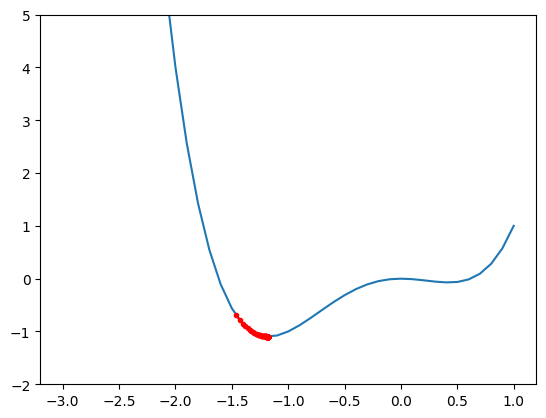

In [117]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-3.0, 1.0]])
# define the total iterations
n_iter = 100
# define the step size
step_size = 0.01
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-2.0, 5.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Here we can immediately notice the problem we mentioned earlier. Depending on the algorithm's initialization, we obtain two different results, as the starting point leads us to either a local minimum or a global one. Now, with the momentum variant, this problem can be resolved.

##Gradient Descent with Momentum

>59 f(-1.0017459618439708) = -1.00174


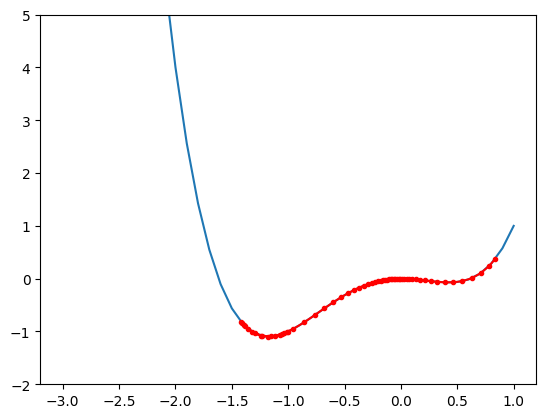

In [133]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-3.0, 1.0]])
# define the total iterations
n_iter = 60
# define the step size
step_size = 0.01
# define momentum
momentum = 0.91
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-2.0, 5.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

##Inverse Time Decay

>599 f(-1.175390529679108) = -1.09673


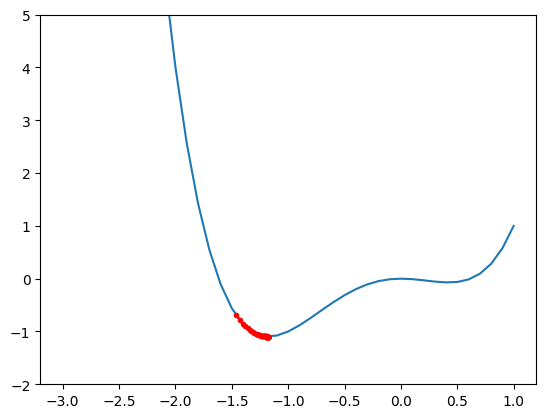

In [137]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-3.0, 1.0]])
# define the total iterations
n_iter = 600
# define the step size
step_size = 0.01
# define the decay rate
decay_rate = 0.001
# perform the gradient descent search
solutions, scores = gradient_descent_ITD(objective, derivative, bounds, n_iter, step_size, decay_rate)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-2.0, 5.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In the case of Gradient Descent with Momentum, we can clearly see the initialization point that, with a classic version of the algorithm, should converge towards the local minimum on the right. In our case, however, thanks to the idea of momentum, we manage to overcome the local maximum between the two minima and move to the true global minimum of the function. Momentum also causes a slight loss of precision, but the final result is still better than the previous one, especially since we now know about the existence of a better minimum than before and thus could implement a progressive reduction of the momentum (just like in Inverse Time Decay) to further improve precision.

#Objective Function f(x)=(1-x)^2+100(1-x^2)^2

This function was chosen because, being very steep, it is useful to have a high learning rate in the initial phases of computation to reach a minimum as quickly as possible. As the iterations increase, the learning rate decreases, allowing the algorithm to converge to a better and more precise solution. In this specific case, the minimum of the function is f(globalMin)=1.

(In this last function, it was necessary to use the NumPy library to employ the "clip" function because the function  f(x) is very steep, and it was essential to restrict the calculation of the function and its derivative to print the graphs without issues.)

In [168]:
import numpy as np

In [169]:
def objective(x):
    x = np.clip(x, -10, 10)
    return (1-x)**2+100*(1-x**2)**2

In [170]:
# derivative of objective function
def derivative(x):
    x = np.clip(x, -10, 10)
    return 400*x**3-398*x**2-2

In [171]:
# define range for input
r_min, r_max = -4.0, 4.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)

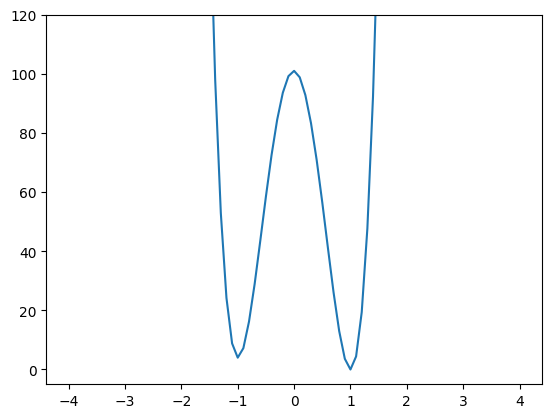

In [172]:
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-5.0, 120.0])
# show the plot
pyplot.show()

##Vanilla Gradient Descent


>19 f(3609.259471309996) = 980181.00000


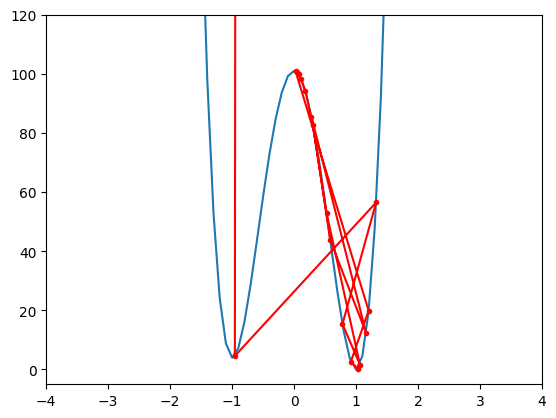

In [193]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-2.0, 2.0]])
# define the total iterations
n_iter = 20
# define the step size
step_size = 0.01
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-5.0, 120.0])
# set the limits for x-axis
pyplot.xlim([-4.0, 4.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

##Gradient Descent with Momentum



>59 f(-1281.324448132831) = 980221.00000


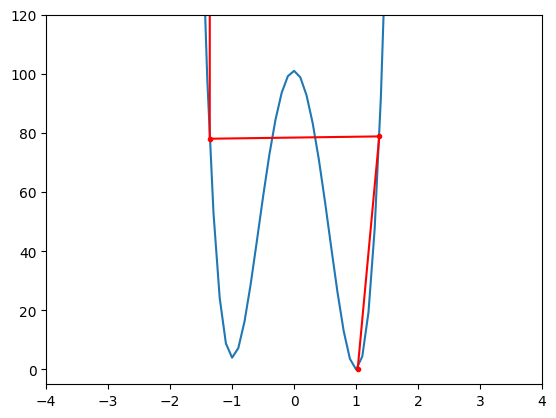

In [194]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-2.0, 2.0]])
# define the total iterations
n_iter = 60
# define the step size
step_size = 0.01
# define momentum
momentum = 0.30
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-5.0, 120.0])
# set the limits for x-axis
pyplot.xlim([-4.0, 4.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

##Gradient Descent with Inverse Time Decay


>39 f(1.0) = 0.00000


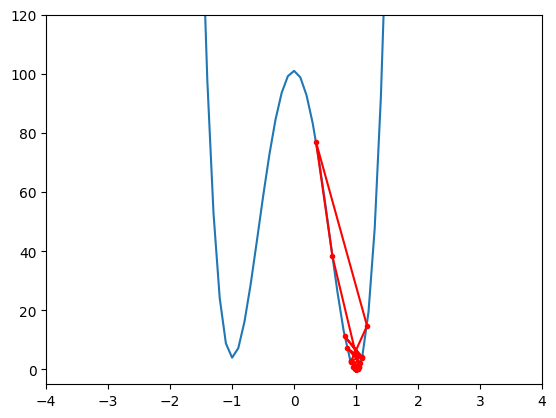

In [202]:
# seed the pseudo random number generator
seed(42)
# define range for input
bounds = asarray([[-2.0, 2.0]])
# define the total iterations
n_iter = 40
# define the step size
step_size = 0.01
# define the decay rate
decay_rate = 0.099
# perform the gradient descent search
solutions, scores = gradient_descent_ITD(objective, derivative, bounds, n_iter, step_size, decay_rate)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# set the limits for y-axis
pyplot.ylim([-5.0, 120.0])
# set the limits for x-axis
pyplot.xlim([-4.0, 4.0])
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

As we can see, reducing the learning rate as the number of iterations increases in this case produces a perfect result, allowing the algorithm to converge to the global minimum. This is something that the other two methods cannot achieve because they do not have a variable learning rate.

#Final Considerations

In conclusion, I have shown three examples, each featuring a different function, to highlight the advantages and disadvantages of various Gradient Descent variants in finding the optimal point. This illustrates how the choice of technique can significantly impact both the speed and accuracy of solving a problem. Such analysis should be conducted before implementing an algorithm to determine the best approach, how to set hyperparameters, and, if applicable, the most favorable initialization points if identified.